In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


# Airport

In [31]:
# Определяем позиции столбцов
column_specs = [
    (0, 21),   # Airport
    (21, 43),  # City
    (43, 49),  # Scheduled departures
    (50, 56),  # Performed departures
    (57, 65),  # Enplaned passengers
    (66, 75),  # Enplaned revenue tons of freight
    (76, 85)   # Enplaned revenue tons of mail
]

# Определяем имена столбцов
column_names = [
    "Airport",
    "City",
    "Scheduled departures",
    "Performed departures",
    "Enplaned passengers",
    "Enplaned revenue tons of freight",
    "Enplaned revenue tons of mail"
]

# Читаем файл
df = pd.read_fwf('airportdat.txt', colspecs=column_specs, header=None, names=column_names)



In [32]:
df

,Airport,City,Scheduled departures,Performed departures,Enplaned passengers,Enplaned revenue tons of freight,Enplaned revenue tons of mail
0,HARTSFIELD INTL,ATLANTA,285693,288803,22665665,165668.76,93039.48
1,BALTO/WASH INTL,BALTIMORE,73300,74048,4420425,18041.52,19722.93
2,LOGAN INTL,BOSTON,114153,115524,9549585,127815.09,29785.72
3,DOUGLAS MUNI,CHARLOTTE,120210,121798,7076954,36242.84,15399.46
4,OHARE INTL,CHICAGO,322430,332338,25636383,300463.80,140359.38
...,...,...,...,...,...,...,...
129,FOSS FIELD,SIOUX FALLS,6466,6514,226436,1163.97,1556.28
130,MICHIANA REGIONAL,SOUTH BEND,6630,7072,224050,1826.00,212.82
131,SPOKANE INTL,SPOKANE,25315,25837,747329,7827.61,2283.69
132,TALLAHASSEE REGIONAL,TALLAHASSEE,9193,9306,381840,1492.52,699.40


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Airport                           134 non-null    object 
 1   City                              134 non-null    object 
 2   Scheduled departures              134 non-null    int64  
 3   Performed departures              134 non-null    int64  
 4   Enplaned passengers               134 non-null    int64  
 5   Enplaned revenue tons of freight  134 non-null    float64
 6   Enplaned revenue tons of mail     134 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 7.5+ KB


In [35]:
columns_to_plot = [
    "Scheduled departures",
    "Performed departures",
    "Enplaned passengers",
    "Enplaned revenue tons of freight",
    "Enplaned revenue tons of mail"
]

for column in columns_to_plot:
    print(column)
    df[column] = df[column].astype(np.float64)

Scheduled departures
Performed departures
Enplaned passengers
Enplaned revenue tons of freight
Enplaned revenue tons of mail


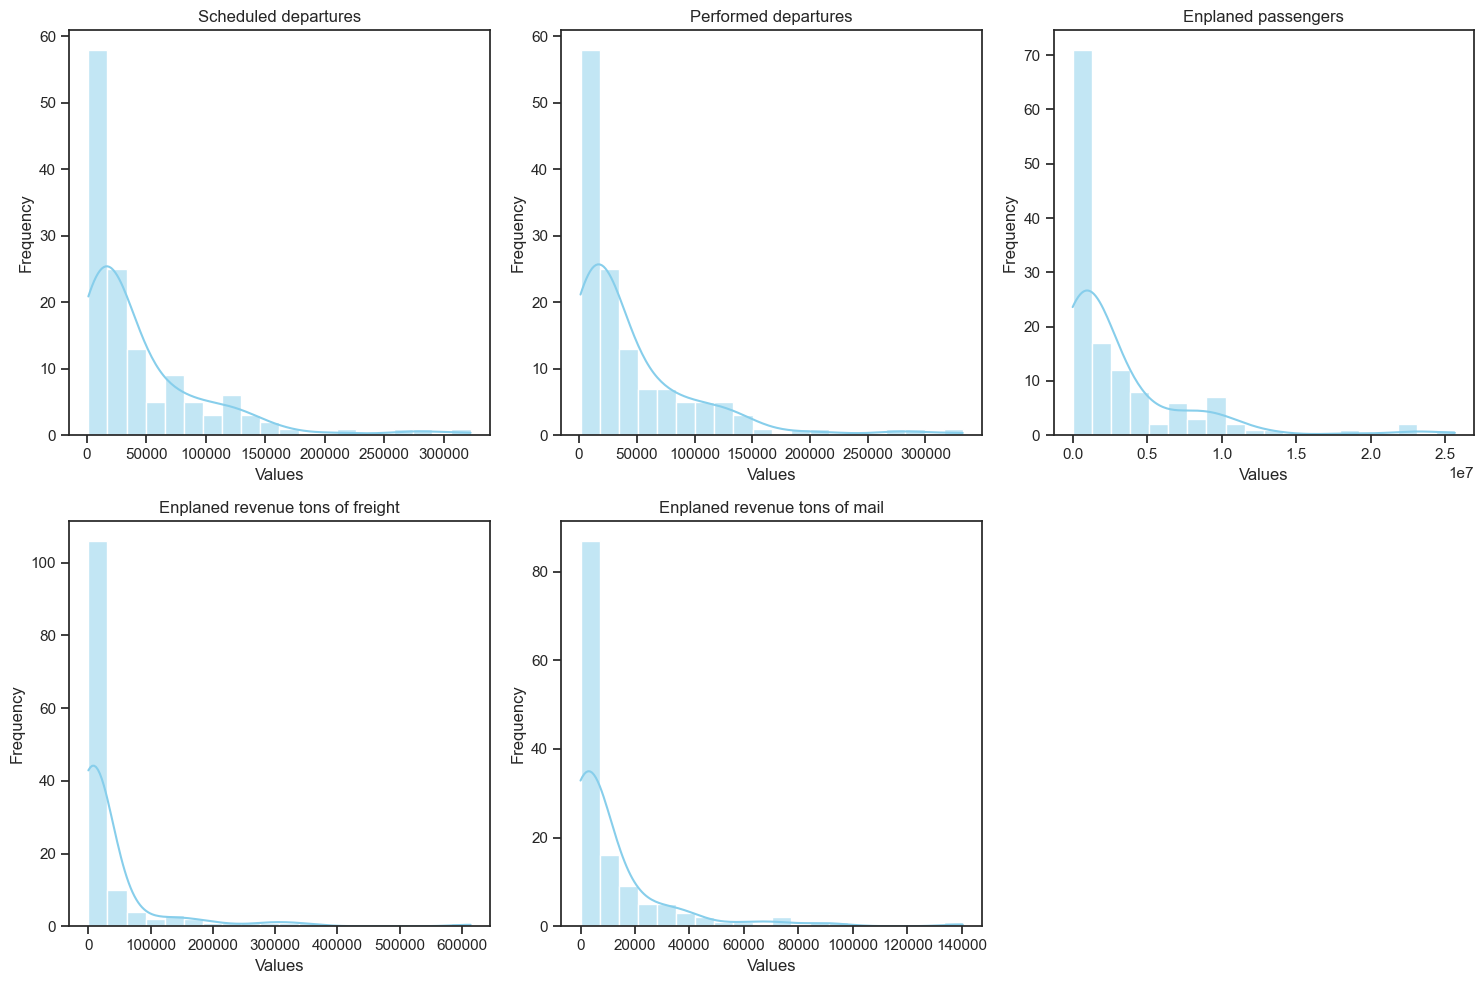

In [36]:
# Предположим, что df уже загружен
columns_to_plot = [
    "Scheduled departures",
    "Performed departures",
    "Enplaned passengers",
    "Enplaned revenue tons of freight",
    "Enplaned revenue tons of mail"
]


sns.set_theme(style="ticks")

# Настраиваем размер сетки для графиков
plt.figure(figsize=(15, 10))

# Генерируем гистограммы для каждого столбца
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # Создаем сетку 2x3
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')  # Гистограмма с KDE (плотностью)
    plt.title(col)  # Заголовок для каждого графика
    plt.xlabel('Values')
    plt.ylabel('Frequency')

# Подгоняем макет
plt.tight_layout()
plt.show()


На графиках явно выражено, что большинство данных приходятся на малые значения, что похоже на экспоненциальное распределение

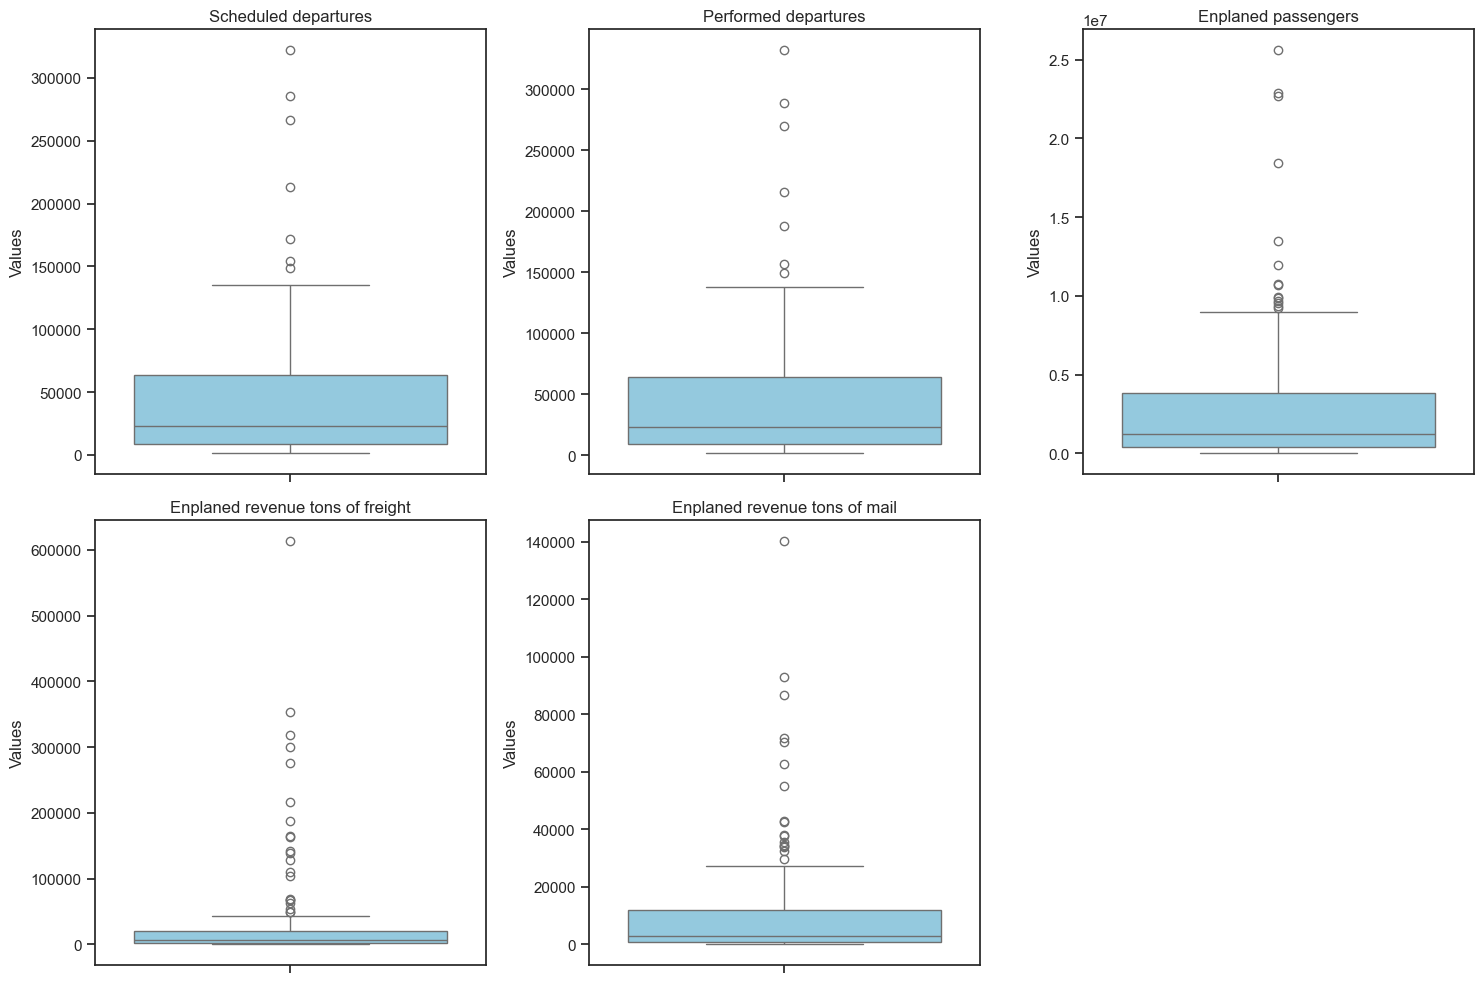

In [39]:
# Предположим, что df уже загружен
columns_to_plot = [
    "Scheduled departures",
    "Performed departures",
    "Enplaned passengers",
    "Enplaned revenue tons of freight",
    "Enplaned revenue tons of mail"
]


sns.set_theme(style="ticks")

# Настраиваем размер сетки для графиков
plt.figure(figsize=(15, 10))

# Генерируем гистограммы для каждого столбца
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # Создаем сетку 2x3
    sns.boxplot(df[col], color='skyblue') 
    plt.title(col)  # Заголовок для каждого графика
    plt.ylabel('Values')

# Подгоняем макет
plt.tight_layout()
plt.show()


По рисунку можно заметить, что большинство данных сосредоточено на относительно малых значениях. По разной длине усов и медиане, которая располагается не по центру, можно понять, что данные ассиметричны.

In [92]:
def get_sample_mean(df, col):
    return df[col].sum() / df[col].count()

def get_sample_variance(df, col):
    sample_mean = get_sample_mean(df, col)
    return ((df[col] - sample_mean) ** 2).sum() / df[col].count()

def get_std(df, col):
    return np.sqrt(get_sample_variance(df, col))

def get_median(df, col):
    return df[col].median()

def get_1_quantile(df, col):
    return df[col].quantile(0.25)

def get_3_quantile(df, col):
    return df[col].quantile(0.75)



In [99]:
columns = [
    "Scheduled departures",
    "Performed departures",
    "Enplaned passengers",
    "Enplaned revenue tons of freight",
    "Enplaned revenue tons of mail"
]

for column in columns:
    print(column)
    print(f"Выборочное среднее: {get_sample_mean(df, column)}")
    print(f"Выборочная дисперсия: {get_sample_variance(df, column)}")
    print(f"Стандартное отклонение: {get_std(df, column)}")
    print(f"Медиана: {get_median(df, column)}")
    print(f"1 квартиль: {get_1_quantile(df, column)}")
    print(f"3 квартиль: {get_3_quantile(df, column)}")
    print("----------")

corr = df[columns].corr()
corr

Scheduled departures
Выборочное среднее: 45562.42537313433
Выборочная дисперсия: 3179038449.2742815
Стандартное отклонение: 56382.96240243396
Медиана: 22864.5
1 квартиль: 9049.0
3 квартиль: 63643.75
----------
Performed departures
Выборочное среднее: 46304.96268656717
Выборочная дисперсия: 3306249551.125474
Стандартное отклонение: 57499.99609674312
Медиана: 23027.5
1 квартиль: 9195.0
3 квартиль: 64196.75
----------
Enplaned passengers
Выборочное среднее: 3136191.925373134
Выборочная дисперсия: 21044494976535.895
Стандартное отклонение: 4587427.926031742
Медиана: 1210722.0
1 квартиль: 424246.75
3 квартиль: 3865530.25
----------
Enplaned revenue tons of freight
Выборочное среднее: 33858.15768656716
Выборочная дисперсия: 6526830812.913332
Стандартное отклонение: 80788.8037596382
Медиана: 6195.27
1 квартиль: 1540.135
3 квартиль: 20558.9225
----------
Enplaned revenue tons of mail
Выборочное среднее: 11461.872537313433
Выборочная дисперсия: 420331114.9242293
Стандартное отклонение: 20501.97

,Scheduled departures,Performed departures,Enplaned passengers,Enplaned revenue tons of freight,Enplaned revenue tons of mail
Scheduled departures,1.000000,0.999690,0.985058,0.593228,0.898682
Performed departures,0.999690,1.000000,0.984522,0.593499,0.899414
Enplaned passengers,0.985058,0.984522,1.000000,0.581516,0.912898
Enplaned revenue tons of freight,0.593228,0.593499,0.581516,1.000000,0.667230
Enplaned revenue tons of mail,0.898682,0.899414,0.912898,0.667230,1.000000


# Babyboom

In [103]:
# Определяем позиции столбцов
column_specs = [
    (0, 8),   # TimeOfBirth
    (8, 16),  # Sex
    (16, 24),  # BirthWeight
    (24, 32),  # NumOfMinutesAfterMidnight
]

# Определяем имена столбцов
column_names = [
    "TimeOfBirth",
    "Sex",
    "BirthWeight",
    "NumOfMinutesAfterMidnight",
]

# Читаем файл
df = pd.read_fwf('babyboomdat.txt', colspecs=column_specs, header=None, names=column_names)



In [104]:
df

,TimeOfBirth,Sex,BirthWeight,NumOfMinutesAfterMidnight
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177
5,405,1,2208,245
6,407,1,1745,247
7,422,2,2846,262
8,431,2,3166,271
9,708,2,3520,428


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   TimeOfBirth                44 non-null     int64
 1   Sex                        44 non-null     int64
 2   BirthWeight                44 non-null     int64
 3   NumOfMinutesAfterMidnight  44 non-null     int64
dtypes: int64(4)
memory usage: 1.5 KB


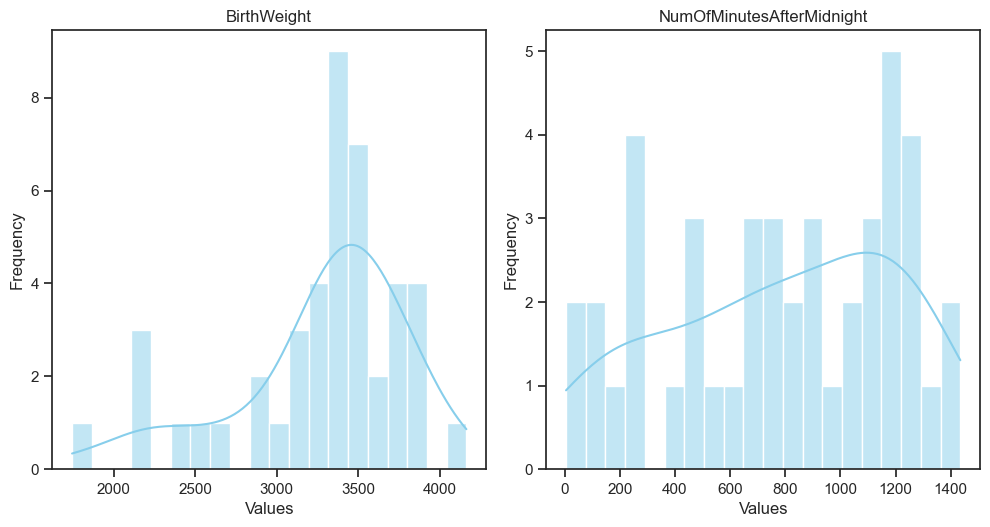

In [106]:
columns_to_plot = [
    "BirthWeight",
    "NumOfMinutesAfterMidnight",
]


sns.set_theme(style="ticks")

# Настраиваем размер сетки для графиков
plt.figure(figsize=(15, 10))

# Генерируем гистограммы для каждого столбца
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # Создаем сетку 2x3
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')  # Гистограмма с KDE (плотностью)
    plt.title(col)  # Заголовок для каждого графика
    plt.xlabel('Values')
    plt.ylabel('Frequency')

# Подгоняем макет
plt.tight_layout()
plt.show()


- BirthWeight <br>
Видна ассиметрия на правой стороне, где большинство данных между 3000 и 4000 граммами.

- NumOfMinutesAfterMidnight <br>
Больше похоже на равномерное распределение, но еще немного похоже на нормальное распределение. Основная часть данных между 500 и 1200 минутами.


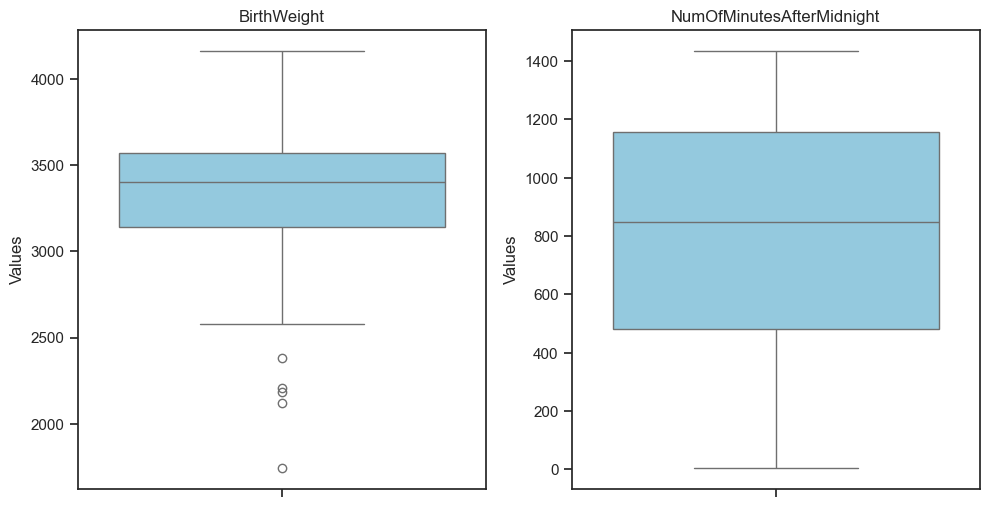

In [109]:
# Предположим, что df уже загружен
columns_to_plot = [
    "BirthWeight",
    "NumOfMinutesAfterMidnight",
]


sns.set_theme(style="ticks")

# Настраиваем размер сетки для графиков
plt.figure(figsize=(15, 10))

# Генерируем гистограммы для каждого столбца
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # Создаем сетку 2x3
    sns.boxplot(df[col], color='skyblue') 
    plt.title(col)  # Заголовок для каждого графика
    plt.ylabel('Values')

# Подгоняем макет
plt.tight_layout()
plt.show()


- BirthWeight <br>
Распределение асимметричное, что видно по медиане, которая расположена ближе к верхней границе ящика. Также есть несколько выбросов, которые располагаются ниже значения в 2500 грамм.

- NumOfMinutesAfterMidnight <br>
Медиана в центре и практически одинаковые усики говорят о симметричности данных. Усики расположены по всему диапазону данных, что говорит об отсутствии значительных выбросов. Распределение похоже на нормальное и симметричное.


In [108]:
columns = [
    "BirthWeight",
    "NumOfMinutesAfterMidnight",
]

for column in columns:
    print(column)
    print(f"Выборочное среднее: {get_sample_mean(df, column)}")
    print(f"Выборочная дисперсия: {get_sample_variance(df, column)}")
    print(f"Стандартное отклонение: {get_std(df, column)}")
    print(f"Медиана: {get_median(df, column)}")
    print(f"1 квартиль: {get_1_quantile(df, column)}")
    print(f"3 квартиль: {get_3_quantile(df, column)}")
    print("----------")

corr = df[columns].corr()
corr

BirthWeight
Выборочное среднее: 3275.9545454545455
Выборочная дисперсия: 272481.4979338844
Стандартное отклонение: 521.997603379445
Медиана: 3404.0
1 квартиль: 3141.5
3 квартиль: 3571.75
----------
NumOfMinutesAfterMidnight
Выборочное среднее: 788.7272727272727
Выборочная дисперсия: 169177.3347107438
Стандартное отклонение: 411.31172449948934
Медиана: 846.5
1 квартиль: 482.75
3 квартиль: 1158.5
----------


,BirthWeight,NumOfMinutesAfterMidnight
BirthWeight,1.000000,0.079616
NumOfMinutesAfterMidnight,0.079616,1.000000
